In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import glob
import json
import numpy as np
import transformations
import cv2
import smplx
import matplotlib.pyplot as plt
from PIL import Image,ImageOps,ImageDraw,ImageFont
from torchvision.transforms.functional import to_pil_image


In [2]:
json_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\json'
rgba_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\rgba'
depth_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\depth'
json_list=glob.glob(json_path+'/*.json')
rgba_list=glob.glob(rgba_path+'/*.png')
depth_list=glob.glob(depth_path+'/*.png')
file_num=1


In [3]:
temp_json=None
with open(json_list[file_num],'r') as f:
    temp_json = json.loads(f.read())
np.vstack(j['trans'] for j in temp_json['joints']).T.shape

C:\Users\user\AppData\Local\Temp\ipykernel_1561452\265935136.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.vstack(j['trans'] for j in temp_json['joints']).T.shape


(3, 65)

In [4]:
import torch
import torchvision.models as models

resnet = models.resnet50(pretrained=True)

input_image = torch.randn(1, 3, 256, 256, requires_grad=True)
mask = torch.ones(1, 1, 256, 256)
mask[:, :, 100:200, 100:200] = 0

# 마스크를 이용하여 입력 이미지 일부에 대한 requires_grad를 비활성화시킴
input_image_masked = input_image * mask
input_image_masked[:, :, 100:200, 100:200]=input_image_masked[:, :, 100:200, 100:200].detach()

output = resnet(input_image_masked)

loss = output.mean()
loss.backward()
print(input_image.grad)


c:\Users\user\anaconda3\envs\smplx\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\smplx\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[[[-6.6836e-10, -1.4325e-09, -1.5230e-09,  ..., -1.3620e-09,
           -1.5823e-10, -8.0731e-11],
          [-1.5427e-09, -9.8912e-10,  8.9981e-10,  ..., -8.3728e-10,
            2.7200e-10,  1.7685e-11],
          [-4.3456e-10, -1.4579e-09, -7.3402e-10,  ..., -4.4046e-10,
            4.9177e-10,  2.7801e-10],
          ...,
          [ 1.1883e-09, -1.4403e-10,  1.3487e-10,  ...,  1.1406e-10,
           -2.0492e-10, -5.8015e-10],
          [ 2.2321e-09,  1.1193e-09,  4.4211e-10,  ..., -5.3731e-10,
            7.0883e-11,  1.2932e-10],
          [ 2.3734e-09,  1.9471e-09, -7.5896e-11,  ..., -4.2027e-10,
            1.8603e-11, -9.9861e-12]],

         [[ 1.5126e-10,  6.1978e-10,  1.1911e-09,  ..., -1.6275e-09,
            1.1834e-11,  6.9899e-11],
          [-3.9739e-10,  2.1670e-09,  5.5340e-09,  ..., -3.8512e-11,
            8.9861e-10,  2.2137e-10],
          [ 2.3962e-10,  8.9052e-10,  2.7129e-09,  ...,  1.2908e-09,
            1.2390e-09,  4.2798e-10],
          ...,
     

In [5]:
"""import cv2
import numpy as np
import torch

# 예시 이미지 (1280x800 크기의 초광각 이미지)
image = cv2.imread('fisheye_image.jpg')

# 이미지 중앙 좌표
center = (image.shape[1] // 2, image.shape[0] // 2)

# crop할 영역의 반지름
radius = min(center[0], center[1])

# 원형 바깥 부분 crop
mask = np.zeros_like(image)
cv2.circle(mask, center, radius, (255, 255, 255), -1)
cropped_image = cv2.bitwise_and(image, mask)

# crop된 이미지 출력
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# # crop된 이미지를 tensor로 변환
# transform = transforms.Compose([
#     transforms.ToPILImage(),    # OpenCV 이미지를 PIL 이미지로 변환
#     transforms.Resize((224, 224)),    # 224x224 크기로 resize
#     transforms.ToTensor()    # Tensor로 변환
# ])
# cropped_tensor = transform(cropped_image)"""


"import cv2\nimport numpy as np\nimport torch\n\n# 예시 이미지 (1280x800 크기의 초광각 이미지)\nimage = cv2.imread('fisheye_image.jpg')\n\n# 이미지 중앙 좌표\ncenter = (image.shape[1] // 2, image.shape[0] // 2)\n\n# crop할 영역의 반지름\nradius = min(center[0], center[1])\n\n# 원형 바깥 부분 crop\nmask = np.zeros_like(image)\ncv2.circle(mask, center, radius, (255, 255, 255), -1)\ncropped_image = cv2.bitwise_and(image, mask)\n\n# crop된 이미지 출력\ncv2.imshow('Cropped Image', cropped_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\n# # crop된 이미지를 tensor로 변환\n# transform = transforms.Compose([\n#     transforms.ToPILImage(),    # OpenCV 이미지를 PIL 이미지로 변환\n#     transforms.Resize((224, 224)),    # 224x224 크기로 resize\n#     transforms.ToTensor()    # Tensor로 변환\n# ])\n# cropped_tensor = transform(cropped_image)"

In [6]:
"""import cv2
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms
img = cv2.imread(rgba_list[file_num],cv2.IMREAD_COLOR)
print(img.shape)
h,w,c = img.shape
c_h,c_w = h//2,w//2
radius = min(c_h,c_w) + 100
mask = np.zeros_like(img)
cv2.circle(mask, (c_w,c_h), radius, (255, 255, 255), -1)
cropped_image = cv2.bitwise_and(img, mask)
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt_img_nocrop = Image.open(rgba_list[file_num]).convert('RGB')

transform = transforms.Compose([
    transforms.ToPILImage(),   
    transforms.Resize((512, 512)),   
    transforms.ToTensor()    
])

transform2 = transforms.Compose([
    # transforms.ToPILImage(),   
    transforms.Resize((512, 512)),   
    transforms.ToTensor()    
])



img = transform(cropped_image)
torch.max(img)
img2 = transform2(plt_img_nocrop)
img2.shape
# # 이미지 크기와 중심 좌표

# center_x, center_y = img_w // 2, img_h // 2

# # 원의 반지름
# radius = 400


# # 원형 crop
# yy, xx = torch.meshgrid(torch.arange(img_h), torch.arange(img_w))
# dist = torch.sqrt((xx - center_x) ** 2 + (yy - center_y) ** 2)
# mask = dist < radius
# mask_triple = mask.unsqueeze(0).repeat(3,1,1)

# masked_img = img[mask_triple].

# # 마스킹하여 gradient flow 방지




# # 이후 cropped_img를 모델의 입력으로 사용합니다."""


"import cv2\nimport numpy as np\nimport torch.nn.functional as F\nimport torchvision.transforms as transforms\nimg = cv2.imread(rgba_list[file_num],cv2.IMREAD_COLOR)\nprint(img.shape)\nh,w,c = img.shape\nc_h,c_w = h//2,w//2\nradius = min(c_h,c_w) + 100\nmask = np.zeros_like(img)\ncv2.circle(mask, (c_w,c_h), radius, (255, 255, 255), -1)\ncropped_image = cv2.bitwise_and(img, mask)\ncv2.imshow('Cropped Image', cropped_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\nplt_img_nocrop = Image.open(rgba_list[file_num]).convert('RGB')\n\ntransform = transforms.Compose([\n    transforms.ToPILImage(),   \n    transforms.Resize((512, 512)),   \n    transforms.ToTensor()    \n])\n\ntransform2 = transforms.Compose([\n    # transforms.ToPILImage(),   \n    transforms.Resize((512, 512)),   \n    transforms.ToTensor()    \n])\n\n\n\nimg = transform(cropped_image)\ntorch.max(img)\nimg2 = transform2(plt_img_nocrop)\nimg2.shape\n# # 이미지 크기와 중심 좌표\n\n# center_x, center_y = img_w // 2, img_h // 2\n\n# # 원

In [7]:
"""img = cv2.imread(rgba_list[file_num],cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('img2', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
h,w,c = img.shape
c_h,c_w = h//2,w//2
radius = min(c_h,c_w) + 100
mask = np.zeros_like(img)
cv2.circle(mask, (c_w,c_h), radius, (255, 255, 255), -1)
cropped_img = cv2.bitwise_and(img, mask)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512,512), Image.BILINEAR),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
tensor_img = transform(cropped_image)
input_image=to_pil_image(tensor_img)
input_image"""

"img = cv2.imread(rgba_list[file_num],cv2.IMREAD_COLOR)\n\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n# cv2.imshow('img2', img)\n# cv2.waitKey(0)\n# cv2.destroyAllWindows()\nh,w,c = img.shape\nc_h,c_w = h//2,w//2\nradius = min(c_h,c_w) + 100\nmask = np.zeros_like(img)\ncv2.circle(mask, (c_w,c_h), radius, (255, 255, 255), -1)\ncropped_img = cv2.bitwise_and(img, mask)\ntransform = transforms.Compose([\n    transforms.ToPILImage(),\n    transforms.Resize((512,512), Image.BILINEAR),\n    transforms.ToTensor(),\n    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n])\ntensor_img = transform(cropped_image)\ninput_image=to_pil_image(tensor_img)\ninput_image"

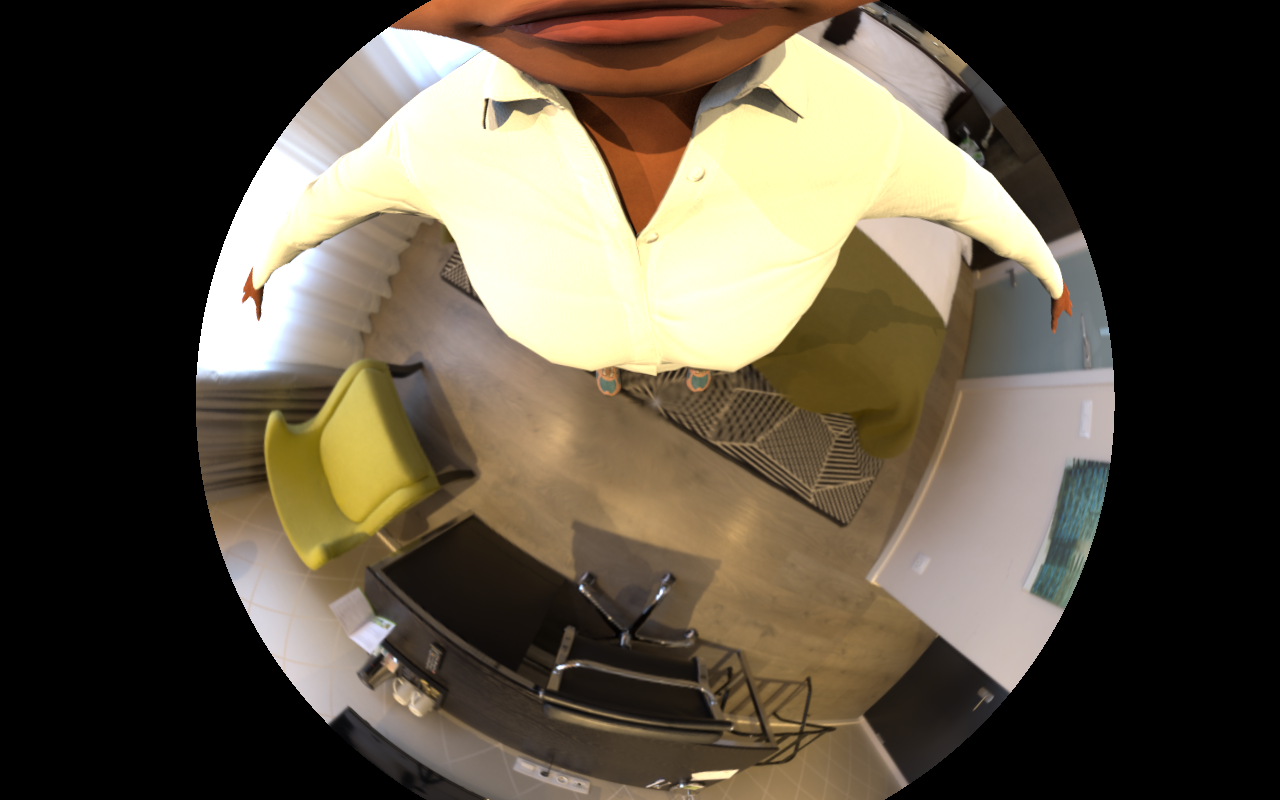

In [8]:
input_image = Image.open(rgba_list[file_num]).convert('RGB')
input_image

In [9]:


skip_num = [13, 14, 15]
xR_2_SMPL=[2,31,61,62,27,57,63,4,34,64,29,59,0,28,58,1,3,33,5,35,6,36,11,41]
def get_3d_joints(json_path):
	
	temp_json=None
	with open(json_path,'r') as f:
		temp_json=json.loads(f.read())
	joints = np.vstack([j['trans'] for j in temp_json['joints']]).T
	x=torch.tensor(joints[0])
	y=torch.tensor(joints[1])
	z=torch.tensor(joints[2])


	res=[x,y,z]
	res = torch.stack(res,0).to(torch.float32).T
	ego_pose_label = res
	
	SMPL_label=[]
	for xR_idx in xR_2_SMPL:
		# TODO : skip num -> enumerate 
		if xR_idx in skip_num : continue
		SMPL_label.append(res[xR_idx])
	SMPL_label=torch.stack(SMPL_label)
	# self.temp_view(SMPL_label)
	return SMPL_label, ego_pose_label

In [10]:
a,b=get_3d_joints(json_list[file_num])
a
b

tensor([[  0.9874, 145.1261,  -2.9866],
        [  1.1422, 166.1220,   3.5596],
        [  0.9340,  92.8421,  -4.3434],
        [ 17.3121, 133.7960,  -4.1481],
        [ 19.1308,  10.0892,  -8.0231],
        [ 38.2223, 133.7704,  -4.1811],
        [ 61.7856, 133.7960,  -4.1448],
        [ 73.4278, 133.6510,  -2.1547],
        [ 76.5038, 133.6515,  -2.1469],
        [ 79.3215, 133.6519,  -2.1398],
        [ 81.8318, 133.6524,  -2.1335],
        [ 74.3724, 133.7982,  -4.1130],
        [ 77.3167, 133.7987,  -4.1056],
        [ 80.0054, 133.7991,  -4.0988],
        [ 82.3529, 133.7995,  -4.0929],
        [ 72.1278, 133.5131,  -7.4803],
        [ 74.5083, 133.5135,  -7.4743],
        [ 76.4139, 133.5139,  -7.4695],
        [ 78.0910, 133.5141,  -7.4654],
        [ 74.4611, 134.1633,  -5.9486],
        [ 76.8711, 134.1637,  -5.9425],
        [ 79.0781, 134.1641,  -5.9369],
        [ 80.9989, 134.1644,  -5.9321],
        [ 66.0499, 132.4047,  -2.1430],
        [ 69.0896, 130.6474,  -0.3784],


In [11]:
resize=(64,64)
def get_fisheye_2d_joints(json_path):
    temp_join=None
    res=None
    with open(json_path,'r') as f:
        temp_json=json.loads(f.read())
    translation = torch.tensor(temp_json['camera']['trans'])
    rotation = torch.tensor(temp_json['camera']['rot']) * np.pi / 180.0
    joints_3d,_ = get_3d_joints(json_path)
    Khmc = torch.tensor([[352.59619801644876, 0.0, 0.0],
                [0.0, 352.70276325061578, 0.0],
                [654.6810228318458, 400.952228031277, 1.0]]).T
    kd = torch.tensor([-0.05631891929412012, -0.0038333424842925286,
                    -0.00024681888617308917, -0.00012153386798050158])

    Mmaya = torch.tensor([[1, 0, 0, 0],
                    [0, -1, 0, 0],
                    [0, 0, -1, 0],
                    [0, 0, 0, 1]],dtype=torch.float64)
        
    Mf = transformations.euler_matrix(rotation[0],
                                    rotation[1],
                                    rotation[2],
                                    'sxyz')

    Mf[0:3, 3] = translation
    Mf = torch.linalg.inv(torch.tensor(Mf))
    M = (Mmaya.T.float())@(Mf.float())

    Xj = M[0:3, 0:3]@(joints_3d.T) + M[0:3, 3:4]
    Xj = Xj.numpy()
    Khmc = Khmc.numpy()
    kd = kd.numpy()
    pts2d, jac = cv2.fisheye.projectPoints(
        Xj.T.reshape((1, -1, 3)),
        (0, 0, 0),
        (0, 0, 0),
        Khmc,
        kd
    )

    res = pts2d.squeeze(0)
    #res[0]=x,res[1]=y
    
    H,W=800,1280
    norm_res = res/np.array([W,H])
    resized_res = norm_res * np.array(resize)
    return resized_res

In [12]:
get_fisheye_2d_joints(json_list[file_num])

array([[32.57686157, 22.65174316],
       [34.6781311 , 23.96119873],
       [30.51046143, 23.71026367],
       [32.54107056, 20.95255859],
       [35.02024536, 27.5583252 ],
       [30.20066833, 27.01497803],
       [32.4811554 , 18.12711548],
       [34.96661987, 27.49712158],
       [30.28168335, 27.91848877],
       [32.37107544, 12.98364014],
       [34.75722656, 30.00762695],
       [30.47181702, 30.33198242],
       [31.99521484, -1.08678856],
       [36.77275085,  5.35209961],
       [27.75559082,  5.39691406],
       [33.33699036, 49.78975098],
       [43.12864075, 11.27345581],
       [22.04161987, 10.75433105],
       [49.7870636 , 17.61483398],
       [15.79508362, 16.80993652],
       [52.48847656, 22.06350586],
       [13.16671448, 21.09076904],
       [53.19466553, 23.58757568],
       [12.49436264, 22.50682861]])

In [13]:
import torch
import torch.nn as nn
from geometry import create_euler

class FisheyeProjection(nn.Module):
    def __init__(self):
        super().__init__()
        self.K = torch.tensor([[352.59619801644876, 0.0, 0.0],
				  [0.0, 352.70276325061578, 0.0],
				  [654.6810228318458, 400.952228031277, 1.0]]).T.to('cuda')
        self.D = torch.tensor([-0.05631891929412012, -0.0038333424842925286,
						-0.00024681888617308917, -0.00012153386798050158])
        self.Mmaya = torch.tensor([[1, 0, 0, 0],
                            [0, -1, 0, 0],
                            [0, 0, -1, 0],
                            [0, 0, 0, 1]],dtype=torch.float64)
     

    def forward(self, points_3d, rotate, translation):
        batch_size = len(points_3d)
        rotate = create_euler(rotate)
        rotate[:,:,:3,3] = translation.unsqueeze(1)
        Mf = torch.linalg.inv(rotate)
        M = self.Mmaya.T.float()@Mf.float()
        M = M.squeeze(1).to(points_3d.device)

        # Transform points to camera coordinate system
        points_homogeneous = torch.cat((points_3d, torch.ones((batch_size,24,1), device=points_3d.device)), dim=-1).type(torch.FloatTensor).to('cuda')
        # P_ext = torch.cat((self.M[:3,:3], self.t), dim=-1)
        points_camera = torch.einsum('bij,bkj->bki',M,points_homogeneous)

        # Project points to the normalized image plane
        points_normalized = points_camera[:, :, :2] / points_camera[:, :, 2].unsqueeze(-1)

        # Apply fisheye distortion
        r = torch.norm(points_normalized, p=2, dim=-1)
        theta = torch.atan2(r, torch.ones_like(r))
        theta_d = theta * (1 + self.D[0] * theta**2 + self.D[1] * theta**4 + self.D[2] * theta**6 + self.D[3] * theta**8)
        points_distorted = points_normalized * (theta_d / r).unsqueeze(-1)

        # Project distorted points to the image plane
        points_image = torch.matmul(points_distorted, self.K[:2, :2]) + self.K[:2, 2]

        return points_image

In [14]:
"""
# Example usage
K = [[800, 0, 640],
     [0, 800, 360],
     [0, 0, 1]]

D = [-0.3, 0.15, -0.001, 0.0]
R = torch.eye(3)
t = torch.tensor([[0, 0, 5]]).T
"""
# Example usage

temp_join=None
res=None
with open(json_list[file_num],'r') as f:
    temp_json=json.loads(f.read())
translation = torch.tensor(temp_json['camera']['trans'])
rotation = torch.tensor(temp_json['camera']['rot']) * np.pi / 180.0


joints_3d,_ = get_3d_joints(json_list[file_num])
# K = torch.tensor([[352.59619801644876, 0.0, 0.0],
# 				  [0.0, 352.70276325061578, 0.0],
# 				  [654.6810228318458, 400.952228031277, 1.0]]).T

# D = torch.tensor([-0.05631891929412012, -0.0038333424842925286,
# 						-0.00024681888617308917, -0.00012153386798050158])

# Mmaya = torch.tensor([[1, 0, 0, 0],
#                     [0, -1, 0, 0],
#                     [0, 0, -1, 0],
#                     [0, 0, 0, 1]],dtype=torch.float64)

# R = transformations.euler_matrix(rotation[0],
#                                 rotation[1],
#                                 rotation[2],
#                                 'sxyz')
t = translation.unsqueeze(0)



fisheye_proj = FisheyeProjection()

projected_points = fisheye_proj(joints_3d.unsqueeze(0).to('cuda'), rotation.unsqueeze(0).to('cuda'), translation.unsqueeze(0).to('cuda'))


H,W=800,1280
norm_res = projected_points/torch.tensor([W,H]).to('cuda')
resized_res = norm_res * torch.tensor(resize).to('cuda')

print(resized_res)

KeyboardInterrupt: 

In [ ]:
# raise

In [ ]:

# 가우시안 분포를 생성하는 함수
def generate_gaussian_heatmap(image_size, joint_location, sigma):
	x, y = joint_location
	grid_y, grid_x = np.mgrid[0:image_size[1], 0:image_size[0]]
	dist = (grid_x - x) ** 2 + (grid_y - y) ** 2
	heatmap = np.exp(-dist / (2 * sigma**2))
	return heatmap

# heatmap GT 생성 함수
def generate_heatmap_gt(image_size, joint_location, sigma):
	heatmap_gt = np.zeros((len(joint_location),image_size[1], image_size[0]), dtype=np.float32)
	for i, joint in enumerate(joint_location):
		heatmap_gt[i, :, :] = generate_gaussian_heatmap(image_size, joint, sigma)
	return heatmap_gt




In [ ]:

label_data=get_fisheye_2d_joints(json_list[file_num])
# 관절 위치, 가우시안 분포 크기, 이미지 크기를 지정합니다.
joint_location = [(x, y) for x, y in label_data]
sigma = 1
image_size = resize

# heatmap GT를 생성합니다.
heatmap_gt = generate_heatmap_gt(image_size, joint_location, sigma)

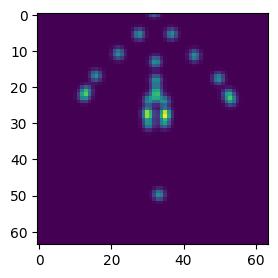

In [ ]:

# resized_heatmap = np.zeros((24, 64, 64))

# for i in range(24):
#     resized_heatmap[i] = cv2.resize(heatmap_gt[i], (512,512), interpolation=cv2.INTER_LINEAR)



total_heatmap=np.zeros_like(heatmap_gt[0,:,:])


for i in range(24):
    total_heatmap+=heatmap_gt[i,:,:]

# raise
# total_heatmap+=resized_heatmap[147:,47
fig,ax = plt.subplots(1,1,figsize=(3, 3))

ax.imshow(total_heatmap)
# raise

1280 800


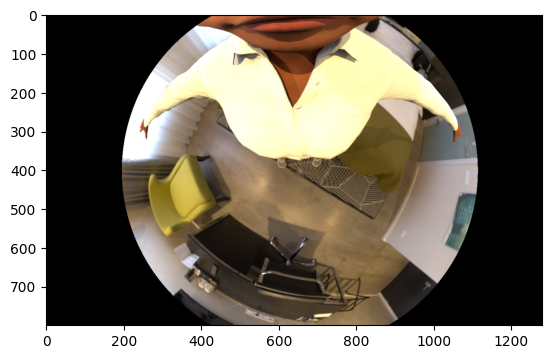

In [ ]:
temp_rgbs=rgba_list[file_num]
tempimg=Image.open(temp_rgbs)
print(tempimg.width,tempimg.height)
plt.imshow(tempimg)

In [ ]:
xR_2_SMPL=[2,31,61,62,27,57,63,4,34,64,29,59,0,28,58,1,3,33,5,35,6,36,11,41]
skip_num = [13, 14, 15]

temp_json=None
with open(json_list[file_num],'r') as f:
    temp_json=json.loads(f.read())
    
temp_3d_coords_ego=temp_json['pts3d_fisheye']
temp_3d_coords_ego=np.array(temp_3d_coords_ego).T
SMPLst_joint_xr=[]
for xR_idx in xR_2_SMPL:
    if xR_idx in skip_num : continue
    SMPLst_joint_xr.append(temp_3d_coords_ego[xR_idx])
 


SMPLst_joint_xr = np.array(SMPLst_joint_xr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-8.177154250337967 -19.22250176956909 62.173514912816785


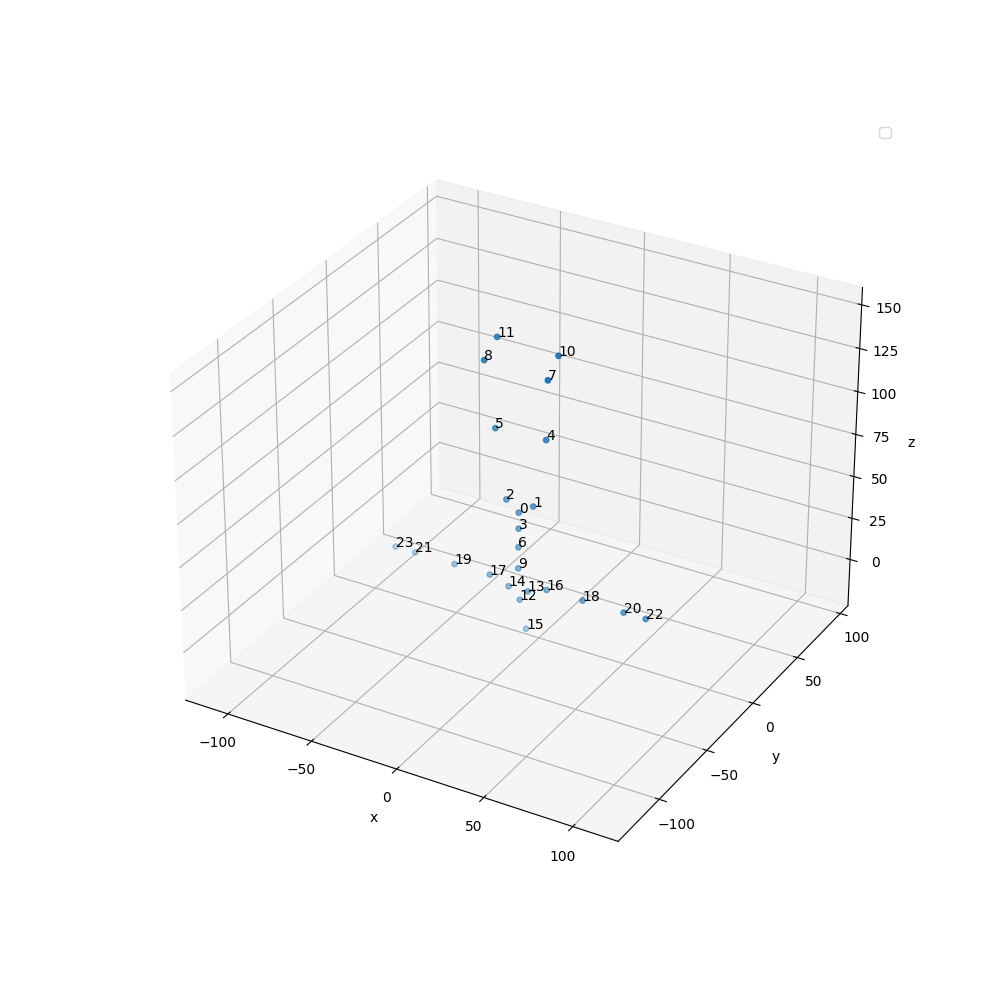

In [ ]:
%matplotlib widget

x=SMPLst_joint_xr[:,0]
y=SMPLst_joint_xr[:,1]
z=SMPLst_joint_xr[:,2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker='o',s=15)
ax.set_aspect('equal')
for i,(x,y,z) in enumerate(zip(x,y,z)):
	if i==2:
		print(x,y,z)
	ax.text(x,y,z,str(i))

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
model_folder = r'C:\Users\user\Documents\GitHub\smplx'
model_type = 'smpl'
plot_joints = 'true'
use_face_contour = False
gender = 'female'
ext = 'npz'
plotting_module = 'matplotlib'
num_betas = 10
num_expression_coeffs = 10
sample_shape = True
sample_expression = True

In [ ]:
model = smplx.create(model_folder, model_type=model_type,
                         gender=gender, use_face_contour=use_face_contour,
                         num_betas=num_betas,
                         num_expression_coeffs=num_expression_coeffs,
                         ext=ext)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
betas = torch.randn([1, model.num_betas], dtype=torch.float32)
expression = torch.randn([1, model.num_expression_coeffs], dtype=torch.float32)
pose=torch.zeros([1, 23 * 3], dtype=torch.float32)
go=torch.zeros([1, 3], dtype=torch.float32)


In [ ]:
output = model(
    global_orient=go,
    body_pose=pose,
    expression=expression,
    return_verts=True,
	
    )

In [ ]:
temp_3d_coords_smpl=output.joints.clone().detach()
raw_smpl_output=output.joints.clone().detach()[:,:24,:].float()
print(temp_3d_coords_smpl.shape)
temp_3d_coords_smpl=temp_3d_coords_smpl.squeeze()
temp_3d_coords_smpl=temp_3d_coords_smpl.numpy().squeeze()

temp_3d_coords_smpl = temp_3d_coords_smpl[:24,:]
temp_3d_coords_smpl.shape
print(raw_smpl_output)
raw_smpl_output[:,0,:]

torch.Size([1, 45, 3])
tensor([[[-8.7631e-04, -2.1142e-01,  2.7821e-02],
         [ 7.0485e-02, -3.0100e-01,  1.9775e-02],
         [-6.9888e-02, -3.0038e-01,  2.3025e-02],
         [-3.3845e-03, -1.0816e-01,  5.6360e-03],
         [ 1.0115e-01, -6.6521e-01,  1.3086e-02],
         [-1.0604e-01, -6.7103e-01,  1.3840e-02],
         [ 1.9644e-04,  1.9496e-02,  3.9230e-03],
         [ 8.9600e-02, -1.0486e+00, -3.0416e-02],
         [-9.2012e-02, -1.0547e+00, -2.8051e-02],
         [ 2.2236e-03,  6.8568e-02,  3.1790e-02],
         [ 1.1294e-01, -1.1032e+00,  8.3955e-02],
         [-1.1406e-01, -1.1011e+00,  8.9848e-02],
         [ 2.6099e-04,  2.7681e-01, -1.7975e-02],
         [ 7.7522e-02,  1.8635e-01, -5.0846e-03],
         [-7.4809e-02,  1.8417e-01, -1.0020e-02],
         [ 3.7782e-03,  3.3913e-01,  3.2230e-02],
         [ 1.6284e-01,  2.1809e-01, -1.2377e-02],
         [-1.6401e-01,  2.1696e-01, -1.9823e-02],
         [ 4.1409e-01,  2.0612e-01, -3.9896e-02],
         [-4.1000e-01,  2.0

tensor([[-0.0009, -0.2114,  0.0278]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.06988832 -0.30037916 0.023025434


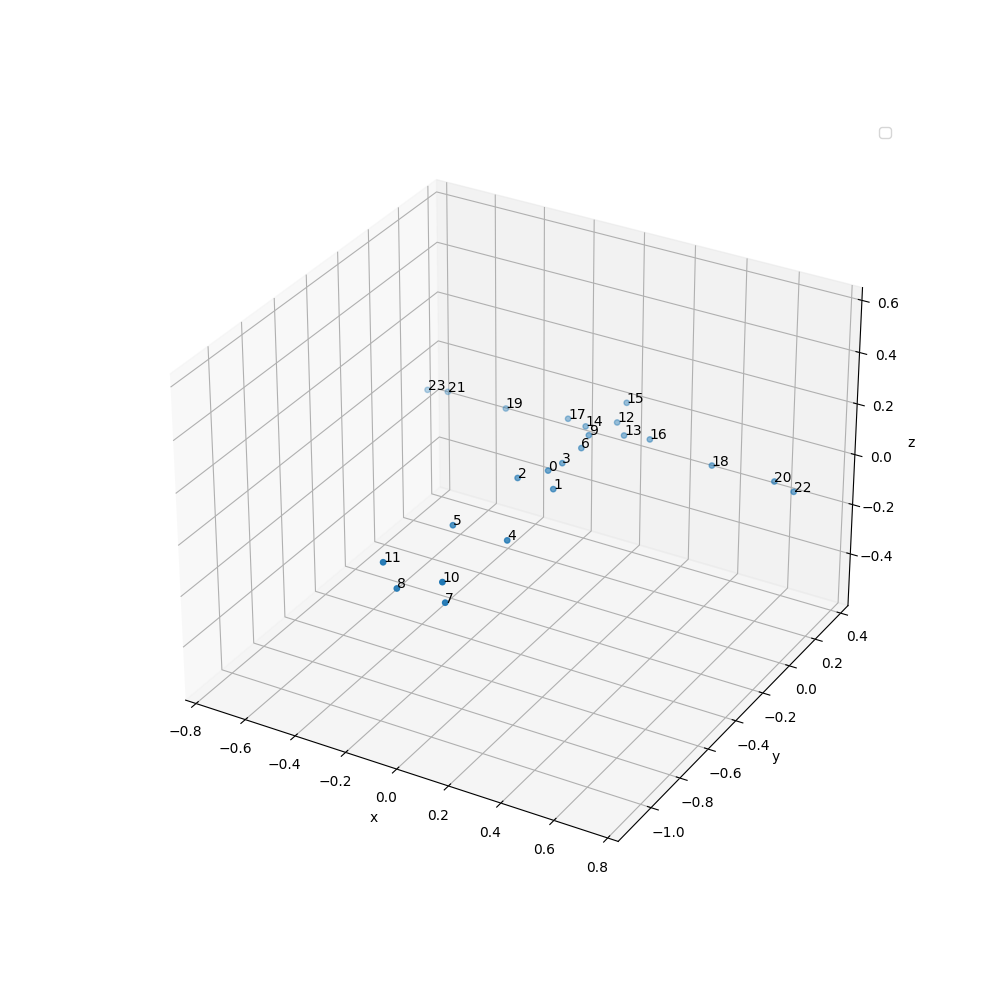

In [ ]:
%matplotlib widget
x=temp_3d_coords_smpl[:,0]
y=temp_3d_coords_smpl[:,1]
z=temp_3d_coords_smpl[:,2]
fig = plt.figure(figsize=(10,10))
pelvis_x=x[0]
pelvis_y=y[0]
pelvis_z=z[0]

ax = fig.add_subplot(111, projection='3d')
ax.scatter((x),(y),(z),marker='o',s=15)
ax.set_aspect('equal')
for i,(x,y,z) in enumerate(zip(x,y,z)):
    if i==2:
        print(x,y,z)
    ax.text((x),(y),(z),str(i))

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
def procrustes(X, Y, scaling=True, reflection='best'):
    """
    A port of MATLAB's `procrustes` function to Numpy.

    Procrustes analysis determines a linear transformation (translation,
    reflection, orthogonal rotation and scaling) of the points in Y to best
    conform them to the points in matrix X, using the sum of squared errors
    as the goodness of fit criterion.

        d, Z, [tform] = procrustes(X, Y)

    Inputs:
    ------------
    X, Y    
        matrices of target and input coordinates. they must have equal
        numbers of  points (rows), but Y may have fewer dimensions
        (columns) than X.

    scaling 
        if False, the scaling component of the transformation is forced
        to 1

    reflection
        if 'best' (default), the transformation solution may or may not
        include a reflection component, depending on which fits the data
        best. setting reflection to True or False forces a solution with
        reflection or no reflection respectively.

    Outputs
    ------------
    d       
        the residual sum of squared errors, normalized according to a
        measure of the scale of X, ((X - X.mean(0))**2).sum()

    Z
        the matrix of transformed Y-values

    tform   
        a dict specifying the rotation, translation and scaling that
        maps X --> Y

    """

    n,m = X.shape
    ny,my = Y.shape

    muX = X.mean(0)
    muY = Y.mean(0)

    X0 = X - muX
    Y0 = Y - muY

    ssX = (X0**2.).sum()
    ssY = (Y0**2.).sum()

    # centred Frobenius norm
    normX = np.sqrt(ssX)
    normY = np.sqrt(ssY)

    # scale to equal (unit) norm
    X0 /= normX
    Y0 /= normY

    if my < m:
        Y0 = np.concatenate((Y0, np.zeros(n, m-my)),0)

    # optimum rotation matrix of Y
    A = np.dot(X0.T, Y0)
    U,s,Vt = np.linalg.svd(A,full_matrices=False)
    V = Vt.T
    T = np.dot(V, U.T)

    if reflection != 'best':

        # does the current solution use a reflection?
        have_reflection = np.linalg.det(T) < 0

        # if that's not what was specified, force another reflection
        if reflection != have_reflection:
            V[:,-1] *= -1
            s[-1] *= -1
            T = np.dot(V, U.T)

    traceTA = s.sum()

    if scaling:

        # optimum scaling of Y
        b = traceTA * normX / normY

        # standarised distance between X and b*Y*T + c
        d = 1 - traceTA**2

        # transformed coords
        Z = normX*traceTA*np.dot(Y0, T) + muX

    else:
        b = 1
        d = 1 + ssY/ssX - 2 * traceTA * normY / normX
        Z = normY*np.dot(Y0, T) + muX

    # transformation matrix
    if my < m:
        T = T[:my,:]
    c = muX - b*np.dot(muY, T)
    
    #transformation values 
    tform = {'rotation':T, 'scale':b, 'translation':c}
   
    return d, Z, tform

In [ ]:
print(temp_3d_coords_smpl.shape)
print(SMPLst_joint_xr.shape)

# from scipy.spatial import procrustes

# 두 개의 입력 배열
xr_dataset = SMPLst_joint_xr
smpl_model = temp_3d_coords_smpl
print(xr_dataset)
# procrustes analysis 수행
converted_xr, converted_smpl, tform = procrustes(xr_dataset, smpl_model)



# 정렬된 두 배열 출력
tform


(24, 3)
(24, 3)
[[ -0.53130799 -19.90341532  56.95835637]
 [  7.11769932 -18.56359345  62.12999852]
 [ -8.17715425 -19.22250177  62.17351491]
 [ -0.55552916 -20.00724507  47.60928722]
 [ 13.36446511 -16.50134529 101.3446616 ]
 [-14.86994275 -18.56138323 101.33498393]
 [ -0.58406101 -20.12839123  36.70204084]
 [ 17.98489508 -23.04771316 139.66241789]
 [-19.78069692 -20.95348838 139.91362717]
 [ -0.61666878 -20.26684428  24.23662101]
 [ 17.05315492 -10.89395904 147.52365599]
 [-19.11774488  -9.20963907 147.80562311]
 [ -0.668      -18.734        4.67      ]
 [  4.87654865 -20.16148869  12.07223288]
 [ -6.17310045 -20.6695427   12.10407553]
 [ -0.668      -12.26189927 -16.34940918]
 [ 15.70772754 -19.64151549  15.94942432]
 [-16.98313675 -21.15996866  16.04363466]
 [ 36.61650797 -19.40140768  15.90525698]
 [-37.93505393 -21.36164477  16.14258581]
 [ 60.17710535 -19.05749004  15.80073149]
 [-61.49909549 -21.57257646  16.22020081]
 [ 72.7624124  -18.86138003  15.756339  ]
 [-73.34557698 -21

{'rotation': array([[ 9.99820290e-01,  1.89575140e-02, -3.17527435e-05],
        [-2.70736139e-04,  1.26038290e-02, -9.99920532e-01],
        [-1.89556073e-02,  9.99740844e-01,  1.26066964e-02]]),
 'scale': 100.34770633952034,
 'translation': array([ -0.63964109, -18.41915575,  34.41892318])}

In [ ]:
converted_smpl

array([[ -0.77473701, -15.89715565,  55.66781989],
       [  6.4026468 , -16.68191244,  64.64622791],
       [ -7.68715086, -16.62206563,  64.58823836],
       [ -0.9869904 , -17.99698266,  45.27899548],
       [  9.50226797, -17.75525231, 101.18233501],
       [-11.28676798, -18.0811131 , 101.76770305],
       [ -0.62792408, -18.00056577,  32.46768304],
       [  8.43623189, -22.62623293, 139.59242598],
       [ -9.78917191, -22.74227467, 140.2087808 ],
       [ -0.47887801, -15.13895895,  27.57903486],
       [ 10.5616267 , -11.17714418, 145.22008774],
       [-12.22376405, -11.01500548, 145.01471677],
       [ -0.58678443, -19.87187114,   6.62102021],
       [  7.14271541, -18.54609489,  15.71408791],
       [ -8.13116621, -19.33380211,  15.92649052],
       [ -0.33110008, -14.74968017,   0.43112952],
       [ 15.71556234, -19.0752803 ,  12.51990843],
       [-17.06310778, -20.44540483,  12.62475353],
       [ 40.97578794, -21.37315393,  13.68503865],
       [-41.70445759, -22.95265

In [ ]:

fisheye_proj = FisheyeProjection()

projected_points = fisheye_proj(torch.tensor(converted_smpl).unsqueeze(0).to('cuda'), rotation.unsqueeze(0).to('cuda'), translation.unsqueeze(0).to('cuda'))


H,W=800,1280
norm_res = projected_points/torch.tensor([W,H]).to('cuda')
resized_res = norm_res * torch.tensor(resize).to('cuda')

print(resized_res)
projected_points = fisheye_proj(torch.tensor(xr_dataset).unsqueeze(0).to('cuda'), rotation.unsqueeze(0).to('cuda'), translation.unsqueeze(0).to('cuda'))


H,W=800,1280
norm_res = projected_points/torch.tensor([W,H]).to('cuda')
resized_res = norm_res * torch.tensor(resize).to('cuda')

print(resized_res)

tensor([[[32.4565, 38.8211],
         [33.1850, 40.2092],
         [31.7406, 40.1646],
         [32.4500, 37.0780],
         [33.4087, 45.3192],
         [31.4163, 45.3128],
         [32.5028, 34.9723],
         [33.2084, 49.3599],
         [31.6305, 49.3646],
         [32.5201, 34.1917],
         [33.4060, 50.7788],
         [31.3607, 50.7047],
         [32.5447, 30.6547],
         [33.3396, 32.1824],
         [31.7458, 32.1844],
         [32.5734, 29.5531],
         [34.2337, 31.6684],
         [30.8400, 31.6201],
         [36.7395, 31.9237],
         [28.4475, 31.7919],
         [38.9794, 31.8343],
         [26.2437, 31.6199],
         [39.6368, 32.0030],
         [25.6078, 31.7210]]], device='cuda:0')
tensor([[[32.4875, 38.8724],
         [33.2583, 39.7406],
         [31.7067, 39.6792],
         [32.4955, 37.3953],
         [33.7845, 45.4195],
         [31.0788, 45.2034],
         [32.5057, 35.6308],
         [34.0314, 49.3213],
         [30.7562, 49.3932],
         [32.5183, 33.57

In [ ]:
rot=torch.tensor(tform['rotation']).T.float()
trans=torch.tensor(tform['translation'])
print(raw_smpl_output.shape,rot.shape)
raw=raw_smpl_output.clone().detach()
print(raw)

temp=torch.einsum('bij,kj->bik',raw,rot)
temp*=tform['scale']
temp+=trans

# print(xr_dataset)
print(temp)




torch.Size([1, 24, 3]) torch.Size([3, 3])
tensor([[[-8.7631e-04, -2.1142e-01,  2.7821e-02],
         [ 7.0485e-02, -3.0100e-01,  1.9775e-02],
         [-6.9888e-02, -3.0038e-01,  2.3025e-02],
         [-3.3845e-03, -1.0816e-01,  5.6360e-03],
         [ 1.0115e-01, -6.6521e-01,  1.3086e-02],
         [-1.0604e-01, -6.7103e-01,  1.3840e-02],
         [ 1.9644e-04,  1.9496e-02,  3.9230e-03],
         [ 8.9600e-02, -1.0486e+00, -3.0416e-02],
         [-9.2012e-02, -1.0547e+00, -2.8051e-02],
         [ 2.2236e-03,  6.8568e-02,  3.1790e-02],
         [ 1.1294e-01, -1.1032e+00,  8.3955e-02],
         [-1.1406e-01, -1.1011e+00,  8.9848e-02],
         [ 2.6099e-04,  2.7681e-01, -1.7975e-02],
         [ 7.7522e-02,  1.8635e-01, -5.0846e-03],
         [-7.4809e-02,  1.8417e-01, -1.0020e-02],
         [ 3.7782e-03,  3.3913e-01,  3.2230e-02],
         [ 1.6284e-01,  2.1809e-01, -1.2377e-02],
         [-1.6401e-01,  2.1696e-01, -1.9823e-02],
         [ 4.1409e-01,  2.0612e-01, -3.9896e-02],
        

In [ ]:
(rot.T@raw[0,0,:].T)*tform['scale']+trans

C:\Users\user\AppData\Local\Temp\ipykernel_1110988\2965677876.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2985.)
  (rot.T@raw[0,0,:].T)*tform['scale']+trans


tensor([ -1.1298, -21.4781,  13.2459], dtype=torch.float64)

(10, 3, 0, 0)
(10, 3, 3, 3)


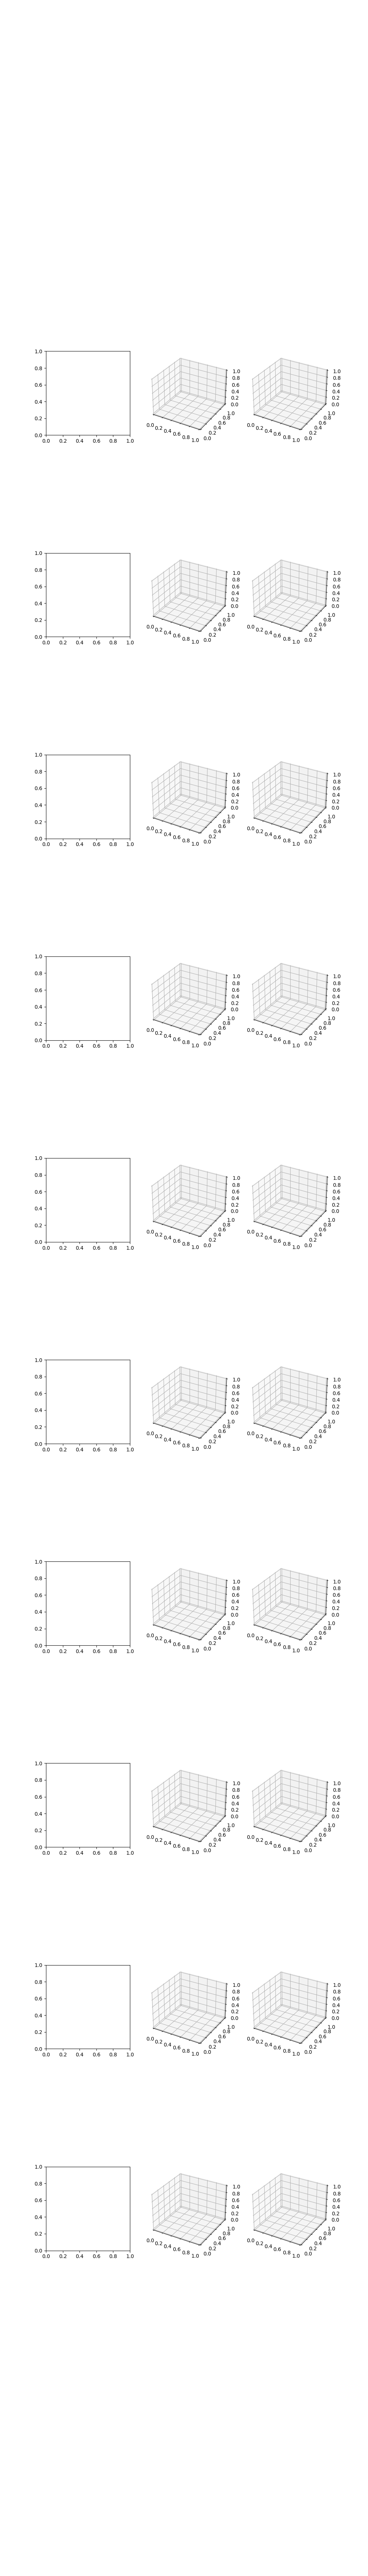

In [ ]:
fig,ax = plt.subplots(10,3,figsize=(10,70),subplot_kw={"projection":"3d"})
for i in range(10):
    rows, cols, start, stop = ax[i][0].get_subplotspec().get_geometry()
    ax[i][0].remove()
    ax[i][0] = fig.add_subplot(rows,cols,start+1)
    ax[i][0].set_aspect('equal')
rows, cols, start, stop = ax[1][0].get_subplotspec().get_geometry()
print(ax[0][0].get_subplotspec().get_geometry())
print(ax[1][0].get_subplotspec().get_geometry())

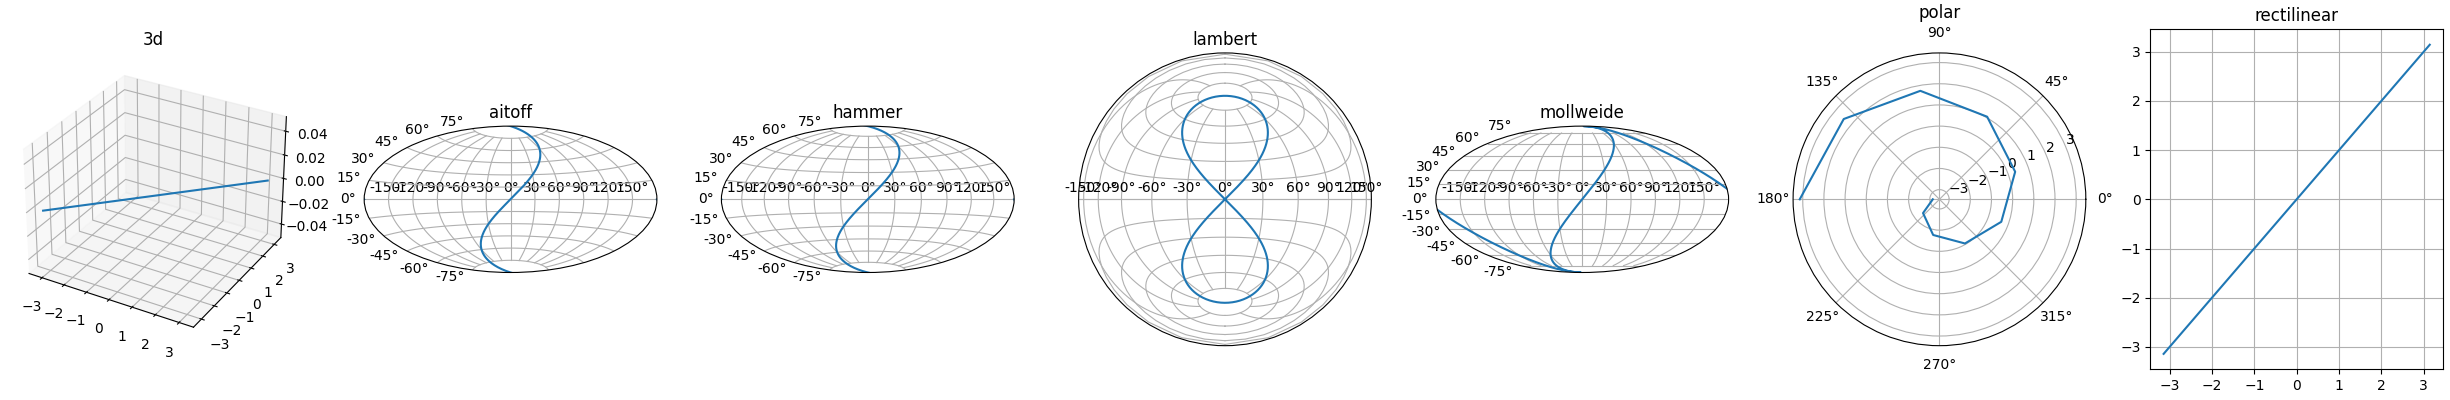

In [ ]:
import matplotlib.projections
import numpy as np
import matplotlib.pyplot as plt

def update_projection(ax, axi, projection='3d', fig=None):
    if fig is None:
        fig = plt.gcf()
    rows, cols, start, stop = axi.get_subplotspec().get_geometry()
    ax.flat[start].remove()
    ax.flat[start] = fig.add_subplot(rows, cols, start+1, projection=projection)
# test data
x = np.linspace(-np.pi, np.pi, 10)

# plot all projections available
projections = matplotlib.projections.get_projection_names()

fig, ax = plt.subplots(nrows=1, ncols=len(projections), figsize=[3.5*len(projections), 4], squeeze=False)
for i, pro_i in enumerate(projections):
    update_projection(ax, ax.flat[i], pro_i)
    ax.flat[i].set_title(pro_i)
    try:
        ax.flat[i].grid(True)
        ax.flat[i].plot(x, x)
    except Exception as a:
        print(pro_i, a)
    
plt.tight_layout(pad=.5)
